In [1]:
# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile, assemble

# import basic plot tools
from qiskit.visualization import plot_histogram
from qiskit_textbook.tools import simon_oracle

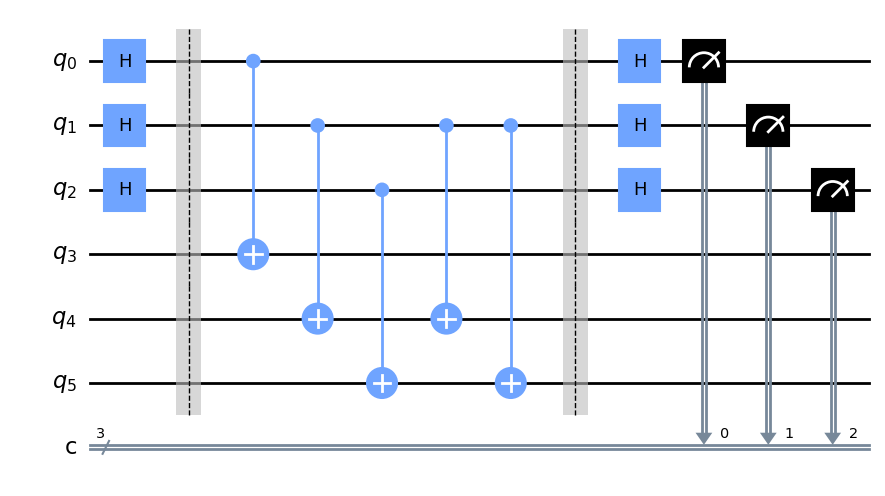

In [14]:
b = '110'

n = len(b)
simon_circuit = QuantumCircuit(n*2, n)

# Apply Hadamard gates before querying the oracle
simon_circuit.h(range(n))    
    
# Apply barrier for visual separation
simon_circuit.barrier()

simon_circuit = simon_circuit.compose(simon_oracle(b)t)

# Apply barrier for visual separation
simon_circuit.barrier()

# Apply Hadamard gates to the input register
simon_circuit.h(range(n))

# Measure qubits
simon_circuit.measure(range(n), range(n))
simon_circuit.draw('mpl')

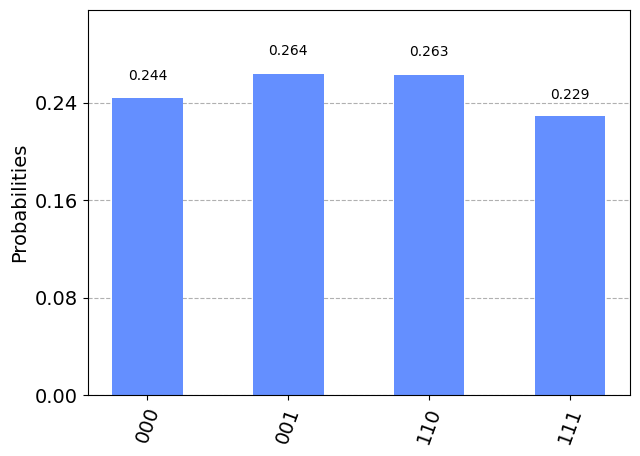

In [15]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
shots = 1024
qobj = assemble(simon_circuit, shots=shots)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

In [29]:
# Calculate the dot product of the results
def bdotz(b, z):
    accum = 0
    for i in range(len(b)):
        accum += int(b[i]) * int(z[i])
    return (accum % 2)

for i in range(2**n):
    b = bin(i)[2:].zfill(3)
    for z in counts:
        print( '{}.{} = {} (mod 2)'.format(b, z, bdotz(b,z)))
    print('\n')

000.001 = 0 (mod 2)
000.000 = 0 (mod 2)
000.110 = 0 (mod 2)
000.111 = 0 (mod 2)


001.001 = 1 (mod 2)
001.000 = 0 (mod 2)
001.110 = 0 (mod 2)
001.111 = 1 (mod 2)


010.001 = 0 (mod 2)
010.000 = 0 (mod 2)
010.110 = 1 (mod 2)
010.111 = 1 (mod 2)


011.001 = 1 (mod 2)
011.000 = 0 (mod 2)
011.110 = 1 (mod 2)
011.111 = 0 (mod 2)


100.001 = 0 (mod 2)
100.000 = 0 (mod 2)
100.110 = 1 (mod 2)
100.111 = 1 (mod 2)


101.001 = 1 (mod 2)
101.000 = 0 (mod 2)
101.110 = 1 (mod 2)
101.111 = 0 (mod 2)


110.001 = 0 (mod 2)
110.000 = 0 (mod 2)
110.110 = 0 (mod 2)
110.111 = 0 (mod 2)


111.001 = 1 (mod 2)
111.000 = 0 (mod 2)
111.110 = 0 (mod 2)
111.111 = 1 (mod 2)




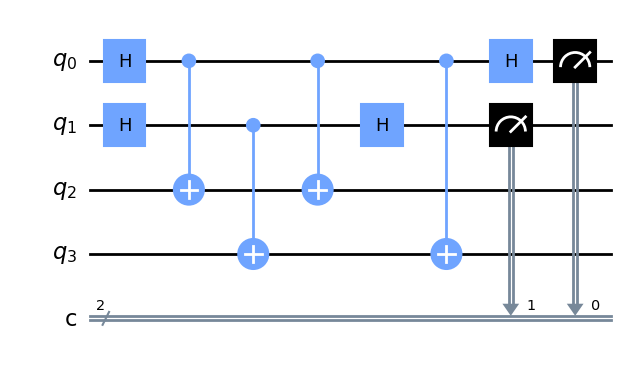

In [17]:
b = '11'
n = len(b)
simon_circuit_2 = QuantumCircuit(n*2, n)

# Apply Hadamard gates before querying the oracle
simon_circuit_2.h(range(n))

# Query oracle
simon_circuit_2 = simon_circuit_2.compose(simon_oracle(b))

# Apply Hadamard gates to the input register
simon_circuit_2.h(range(n))

# Measure qubits
simon_circuit_2.measure(range(n), range(n))
simon_circuit_2.draw('mpl')

In [20]:
# Calculate the dot product of the results
def bdotz(b, z):
    accum = 0
    for i in range(len(b)):
        accum += int(b[i]) * int(z[i])
    return (accum % 2)

print('b = ' + b)
for z in device_counts:
    print( '{}.{} = {} (mod 2) ({:.1f}%)'.format(b, z, bdotz(b,z), device_counts[z]*100/shots))

b = 11
